In [1]:
from fastai.vision.all import *

In [2]:
import pandas as pd

import torch
from torch import nn

from fastcore.meta import use_kwargs_dict

from fastai.callback.progress import ProgressCallback
from fastai.callback.schedule import lr_find, fit_one_cycle

from fastai.data.block import MultiCategoryBlock, DataBlock
from fastai.data.transforms import RandomSplitter, ColReader

from fastai.metrics import accuracy_multi, BaseLoss

from fastai.vision.augment import aug_transforms
from fastai.vision.data import ImageBlock
from fastai.vision.learner import cnn_learner

from torchvision.models import resnet34

In [3]:
path=Path('/home/guardian/Documents/multilabelrobon/')
df = pd.read_csv(path/'lotr.csv')

In [4]:
df.tail(5)

Name   Tags
1556  341r  robo 
1557  342r  robo 
1558  343r  robo 
1559  344r  robo 
1560  345r  robo

In [5]:
batch_tfms = aug_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [6]:
datas = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   get_x=ColReader(0, pref=f'{path}/train/', suff='.jpg'),
                   splitter=RandomSplitter(),
                   item_tfms=RandomResizedCrop(224,min_scale=0.5),
                   get_y=ColReader(1, label_delim=' '),
                   batch_tfms = batch_tfms)

In [7]:

dls = datas.dataloaders(df,bs=16)

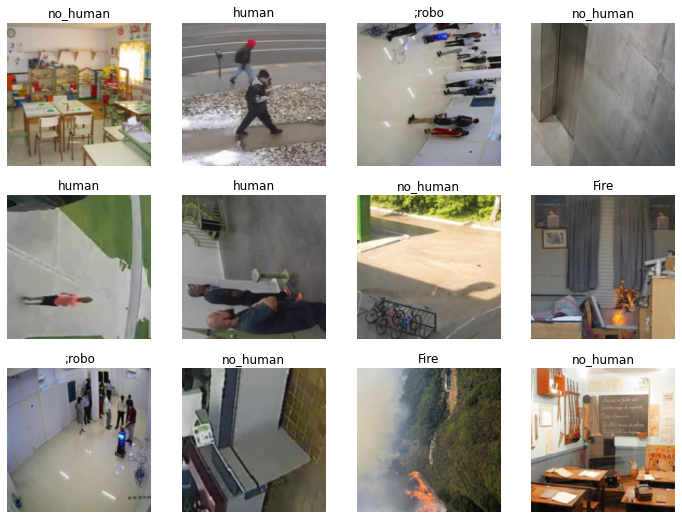

In [8]:
dls.show_batch(max_n=12, figsize=(12,9))
#dls.show_batch(nrows=1,figsize=(12,9))

In [9]:
from torchvision.models import resnet34

In [10]:
from fastai.metrics import accuracy_multi

In [11]:
learn = cnn_learner(dls, resnet34, pretrained=True, metrics=[accuracy_multi])

/home/guardian/.local/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [13]:
learn.fine_tune(4)

In [14]:
learn.export()

In [15]:
path=Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

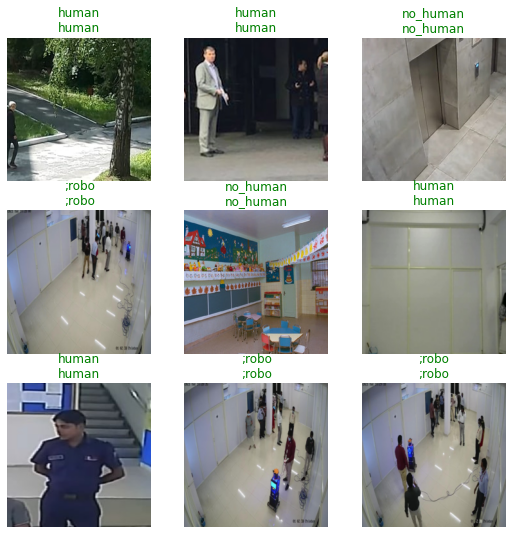

In [16]:
learn.show_results()

In [17]:
learn.predict(path/'train/52r.jpg')

((#2) ['','robo'],
 tensor([ True, False, False, False,  True]),
 tensor([1.0000e+00, 6.6398e-03, 8.1452e-04, 2.3063e-02, 1.0000e+00]))

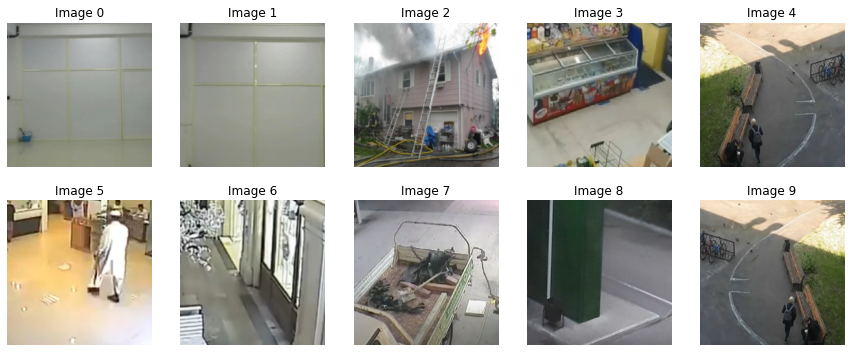

In [18]:
interp = Interpretation.from_learner(learn)
#interp.plot_top_losses(9)
interp.plot_top_losses(10 ,nrows=2)